In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [1]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk

In [4]:
%matplotlib inline

In [5]:
import json

In [43]:
import os

path = 'C:\\Users\\aljubaer\\Desktop\\LDA LDA\\Topic-Modeling-in-Bengali\\data\\new_data'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

all_data = []
for f in files:
    with open(f, encoding = 'utf-8') as json_file:
        sdata = json.load(json_file)
        for data in sdata:
            all_data.append(data)
print(len(all_data))

1359


In [44]:
df = pd.DataFrame(all_data)

In [45]:
# Import Dataset
#df = pd.read_json('../data/newspaper/prothom_alo_2019-02-01.txt')
print(df.shape)
df.head()

(1359, 3)


,content,headline,topics
0,\nফেসবুকে ঢাকায় নিযুক্ত মার্কিন রাষ্ট্রদূত মার...,"\nফেসবুকে মার্কিন রাষ্ট্রদূতকে হত্যার হুমকি, য...","[বাংলাদেশ, অপরাধ]"
1,\nসাব্বির রহমানের প্রতিভা নিয়ে হয়তো প্রশ্ন নেই...,\nসাব্বিরের গচ্চা যাবে প্রায় কোটি টাকা\n,"[খেলা, ক্রিকেট]"
2,\nপয়েন্ট টেবিলের শীর্ষ দুই দল আবাহনী লিমিটেড ও...,\nআব্বাস যেন মুক্তিযোদ্ধার ‌‘বীর সেনানী’\n,"[খেলা, ফুটবল]"
3,\nপদত্যাগের পর গত ৯ ডিসেম্বর বিসিবির মুখোমুখি ...,"\nহাথুরুর কথা ঠিক, বললেন বিসিবি সভাপতি\n","[খেলা, ক্রিকেট]"
4,\nগুপ্তচরবৃত্তির অভিযোগে পাকিস্তানে মৃত্যুদণ্ড...,\nভারত-পাকিস্তানের উপদেষ্টাদের গোপন বৈঠক!\n,"[আন্তর্জাতিক, ভারত]"


In [46]:
# Convert to list
data = df.content.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

[' ফেসবুকে ঢাকায় নিযুক্ত মার্কিন রাষ্ট্রদূত মার্শা বার্নিকাটকে হত্যার হুমকিসহ ধর্মীয় উসকানিমূলক মন্তব্য করার অভিযোগে এক যুবককে গ্রেপ্তার করা হয়েছে। গতকাল রোববার তাঁকে নাটোর থেকে গ্রেপ্তার করেছে ঢাকা মহানগর পুলিশের কাউন্টার টেররিজম ইউনিট। আজ সোমবার ওই যুবকের বিরুদ্ধে রমনা থানায় তথ্য ও যোগাযোগপ্রযুক্তি আইনের ৫৭ ধারা ও দণ্ডবিধির ৪৫৭ ধারায় মামলা করেছে পুলিশ। পরে তাঁকে আদালতে হাজির করে চার দিন রিমান্ড চাইলে দুই দিনের রিমান্ড মঞ্জুর করেন বিচারক। গ্রেপ্তার ওই যুবকের নাম সুজন কুমার (২৫)। তাঁর বাড়ি নাটোরের লালপুর উপজেলায়। মামলার এজাহারে বলা হয়েছে, একটি গণমাধ্যমের ফেসবুক পেজে প্রকাশিত সংবাদে মন্তব্য করতে গিয়ে হাসান রুহানি নামের ফেসবুক আইডি থেকে সুজন কুমার মার্কিন রাষ্ট্রদূত মার্শা বার্নিকাটকে হত্যার হুমকি দেন। এর বাইরে হাসান রুহানি নামের ওই আইডি থেকে অনেক আপত্তিকর ও উসকানিমূলক মন্তব্য করা হয়। সুজন পুলিশের কাছে স্বীকার করেছেন, ফেসবুকে হাসান রুহানি তাঁর নিজের অ্যাকাউন্ট। সুজন কুমারের মন্তব্য করা ২৫ পাতা স্ক্রিনশট জব্দ করা হয়েছে। মামলার বাদী হলেন কাউন্টার টেররিজম বিভাগের সোশ্যাল মিডিয়া মনিটরিং টিমে

In [47]:
def valid_bengali_letters(char):
    return ord(char) >= 2433 and ord(char) <= 2543 

def get_replacement(char):
    if valid_bengali_letters(char):
        return char
    newlines = [10, 2404, 2405, 2551, 9576]
    if ord(char) in newlines: 
        return ' '
    return ' ';

def get_valid_lines(line):
    copy_line = ''
    for letter in line:
        copy_line += get_replacement(letter)
    return copy_line

In [48]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(get_valid_lines(sentence)))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['ফেসবুকে', 'ঢাকায়', 'নিযুক্ত', 'মার্কিন', 'রাষ্ট্রদূত', 'মার্শা', 'বার্নিকাটকে', 'হত্যার', 'হুমকিসহ', 'ধর্মীয়', 'উসকানিমূলক', 'মন্তব্য', 'করার', 'অভিযোগে', 'এক', 'যুবককে', 'গ্রেপ্তার', 'করা', 'হয়েছে', 'গতকাল', 'রোববার', 'তাঁকে', 'নাটোর', 'থেকে', 'গ্রেপ্তার', 'করেছে', 'ঢাকা', 'মহানগর', 'পুলিশের', 'কাউন্টার', 'টেররিজম', 'ইউনিট', 'আজ', 'সোমবার', 'ওই', 'যুবকের', 'বিরুদ্ধে', 'রমনা', 'থানায়', 'তথ্য', 'ও', 'যোগাযোগপ্রযুক্তি', 'আইনের', '৫৭', 'ধারা', 'ও', 'দণ্ডবিধির', '৪৫৭', 'ধারায়', 'মামলা', 'করেছে', 'পুলিশ', 'পরে', 'তাঁকে', 'আদালতে', 'হাজির', 'করে', 'চার', 'দিন', 'রিমান্ড', 'চাইলে', 'দুই', 'দিনের', 'রিমান্ড', 'মঞ্জুর', 'করেন', 'বিচারক', 'গ্রেপ্তার', 'ওই', 'যুবকের', 'নাম', 'সুজন', 'কুমার', '২৫', 'তাঁর', 'বাড়ি', 'নাটোরের', 'লালপুর', 'উপজেলায়', 'মামলার', 'এজাহারে', 'বলা', 'হয়েছে', 'একটি', 'গণমাধ্যমের', 'ফেসবুক', 'পেজে', 'প্রকাশিত', 'সংবাদে', 'মন্তব্য', 'করতে', 'গিয়ে', 'হাসান', 'রুহানি', 'নামের', 'ফেসবুক', 'আইডি', 'থেকে', 'সুজন', 'কুমার', 'মার্কিন', 'রাষ্ট্রদূত', 'মার্শা', 'বার্নিকাটকে', 'হত্যা

In [49]:
from b_parser import RafiStemmer

stemmer = RafiStemmer()

In [50]:
for row, single_data in enumerate(data_words):
    for column, word in enumerate(single_data):
        data_words[row][column] = stemmer.stem_word(word)
print(data_words[:1])

[['ফেসবু', 'ঢাকা', 'নিযুক্ত', 'মার্কিন', 'রাষ্ট্রদূত', 'মার্শা', 'বার্নিকাট', 'হত্য', 'হুমকিসহ', 'ধর্মী', 'উসকানিমূলক', 'মন্তব্য', 'কর', 'অভিযোগ', 'এক', 'যুবক', 'গ্রেপ্ত', 'ক', 'হ', 'গতকাল', 'রোবব', 'তাঁ', 'নাটোর', 'থ', 'গ্রেপ্ত', 'কর', 'ঢাকা', 'মহানগর', 'পুলিশ', 'কাউন্ট', 'টেররিজম', 'ইউনিট', 'আজ', 'সোমব', 'ও', 'যুবক', 'বিরুদ্ধ', 'রমনা', 'থানা', 'তথ্য', 'ও', 'যোগাযোগপ্রযুক্তি', 'আইন', '৫৭', 'ধা', 'ও', 'দণ্ডবিধির', '৪৫৭', 'ধারা', 'মামলা', 'কর', 'পুলিশ', 'পর', 'তাঁ', 'আদাল', 'হাজির', 'কর', 'চ', 'দিন', 'রিমান্ড', 'চাইল', 'দু', 'দিন', 'রিমান্ড', 'মঞ্জুর', 'কর', 'বিচারক', 'গ্রেপ্ত', 'ও', 'যুবক', 'নাম', 'সুজন', 'কুম', '২৫', 'তাঁর', 'বাড়ি', 'নাটোর', 'লালপুর', 'উপজেলা', 'মামল', 'এজাহার', 'বলা', 'হ', 'এক', 'গণমাধ্যম', 'ফেসবুক', 'পেজ', 'প্রকাশিত', 'সংবাদ', 'মন্তব্য', 'কর', 'গি', 'হাসান', 'রুহানি', 'নাম', 'ফেসবুক', 'আইডি', 'থ', 'সুজন', 'কুম', 'মার্কিন', 'রাষ্ট্রদূত', 'মার্শা', 'বার্নিকাট', 'হত্য', 'হুমকি', 'দ', 'এর', 'বাইর', 'হাসান', 'রুহানি', 'নাম', 'ও', 'আইডি', 'থ', 'অনেক', 'আপত্তিকর', 'ও', 'উস

In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['আমেরিক', 'মধ্য', 'পশ্চিমাঞ্চল', 'অবাক', 'কর', 'দেওয়', 'ম', 'শীত', 'পড়', 'এ', 'স্বাভাবিক', 'জীবনযাত্', 'প্রা', 'অচল', 'হ', 'পড়', 'বহু', 'অঞ্চল', 'সরকারি', 'অফ', 'স্কুল', 'কলেজসহ', 'বিভিন্ন', 'প্রতিষ্ঠান', 'বন্ধ', 'ঘোষণা', 'ক', 'হ', 'এমনকি', 'ডাক', 'বিভাগ', 'চিঠি', 'বিল', 'বন্দ', 'র', '২৯', 'জানুয়ারি', 'থ', 'এ', 'অঞ্চল', 'কোনো', 'কোনো', 'অঙ্গরাজ্য', 'এ', 'বছর', 'দক্ষিণ', 'মেরুর', 'চা', 'বেশি', 'ঠান্ডা', 'পড়', 'এর', 'মধ্য', 'শিকাগোর', 'দু', 'বিমানবন্দর', '১', 'হাজ', '৬০০', 'ফ্লাইট', 'বাতিল', 'ক', 'হ', 'স্বাভাবিক', 'অবস্থা', 'আমেরিক', 'অন্য', 'অঙ্গরাজ্য', 'তুলনা', 'শিকাগো', 'শীত', 'ও', 'বরফ', 'দুই', 'কম', 'পড়', 'কিন্তু', 'এব', 'চিত্র', 'একেবার', 'ভিন্ন', '৩০', 'জানুয়ারি', 'নর্থ', 'ডাকো', 'তাপমাত্', 'ছিল', 'শূন্য', 'নিচ', '৩৭ডিগ্রি', 'সেলসিয়াস', 'এক', 'দিন', 'মিনেসোট', 'তাপমাত্', 'ছিল', 'শূন্য', 'নিচ', '৩৪', 'ডিগ্রি', 'সেলসিয়াস', 'ও', 'শিকাগো', '৩০', 'ডিগ্রি', 'সেলসিয়াস', 'শিকাগোর', 'এ', 'তাপমাত্', '১৯৬৬', 'সাল', 'সর্বনিম্ন', 'তাপমাত্রা', 'ছাড়ি', 'গি', 'এ', 'তাপমাত্', 'এমনকি', 'আলাস্কা', 

In [51]:
def remove_stop_words(pre_data):
    f = open('stop_words.txt', "r+", encoding = 'utf-8')
    aa = f.read()
    data_stop = [d.strip() for d in aa.split()]
    new_data = []
    for i,line in enumerate(pre_data):
        i_new_data = []
        for word in line:
            if word not in data_stop and len(word) > 2:
                i_new_data.append(word)
        new_data.append(i_new_data)
    return new_data
data_ready = remove_stop_words(data_words)
print(data_ready[:1])

[['ফেসবু', 'ঢাকা', 'নিযুক্ত', 'মার্কিন', 'রাষ্ট্রদূত', 'মার্শা', 'বার্নিকাট', 'হত্য', 'হুমকিসহ', 'ধর্মী', 'উসকানিমূলক', 'মন্তব্য', 'অভিযোগ', 'যুবক', 'গ্রেপ্ত', 'গতকাল', 'রোবব', 'তাঁ', 'নাটোর', 'গ্রেপ্ত', 'ঢাকা', 'মহানগর', 'পুলিশ', 'কাউন্ট', 'টেররিজম', 'ইউনিট', 'সোমব', 'যুবক', 'বিরুদ্ধ', 'রমনা', 'থানা', 'তথ্য', 'যোগাযোগপ্রযুক্তি', 'আইন', 'দণ্ডবিধির', '৪৫৭', 'ধারা', 'মামলা', 'পুলিশ', 'তাঁ', 'আদাল', 'হাজির', 'রিমান্ড', 'চাইল', 'রিমান্ড', 'মঞ্জুর', 'বিচারক', 'গ্রেপ্ত', 'যুবক', 'নাম', 'সুজন', 'কুম', 'বাড়ি', 'নাটোর', 'লালপুর', 'উপজেলা', 'মামল', 'এজাহার', 'গণমাধ্যম', 'ফেসবুক', 'পেজ', 'প্রকাশিত', 'সংবাদ', 'মন্তব্য', 'হাসান', 'রুহানি', 'নাম', 'ফেসবুক', 'আইডি', 'সুজন', 'কুম', 'মার্কিন', 'রাষ্ট্রদূত', 'মার্শা', 'বার্নিকাট', 'হত্য', 'হুমকি', 'বাইর', 'হাসান', 'রুহানি', 'নাম', 'আইডি', 'আপত্তিকর', 'উসকানিমূলক', 'মন্তব্য', 'সুজন', 'পুলিশ', 'স্বীক', 'ফেসবু', 'হাসান', 'রুহানি', 'নিজ', 'অ্যাকাউন্ট', 'সুজন', 'কুমার', 'মন্তব্য', 'পাতা', 'স্ক্রিনশট', 'জব্দ', 'মামল', 'বাদী', 'কাউন্ট', 'টেররিজম', 'বিভাগ', 'সো

In [57]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=30,
                                           passes=30,
                                           alpha='auto',
                                           iterations=1000,
                                           per_word_topics=True)

pprint(lda_model.print_topics(num_words = 25))

[(0,
  '0.036*"ম্যাচ" + 0.025*"লিগ" + 0.025*"রেকর্ড" + 0.023*"বোর্ড" + 0.021*"মাঠ" '
  '+ 0.017*"বন্ধু" + 0.016*"মৌসুম" + 0.016*"জাতী" + 0.016*"কাপ" + '
  '0.015*"সচিব"'),
 (1,
  '0.035*"পাকিস্তান" + 0.022*"ভারত" + 0.016*"দেশ" + 0.016*"রোহিঙ্গা" + '
  '0.012*"নওয়াজ" + 0.012*"সংসদ" + 0.011*"বিষয়" + 0.011*"প্রধানমন্ত্রী" + '
  '0.011*"মাহাথির" + 0.010*"চুক্তির"'),
 (2,
  '0.036*"পরীক্ষা" + 0.019*"স্কুল" + 0.019*"প্রস্তুতি" + 0.017*"কঠিন" + '
  '0.017*"প্রশ্ন" + 0.014*"খেলা" + 0.013*"অধিনায়ক" + 0.013*"ভালো" + '
  '0.013*"সিরিজ" + 0.013*"গুরুত্বপূর্ণ"'),
 (3,
  '0.027*"শহর" + 0.021*"ছবির" + 0.020*"ব্যবহ" + 0.015*"পোস্ট" + '
  '0.015*"সর্বোচ্চ" + 0.013*"নেম" + 0.013*"প্রস্তাব" + 0.012*"সময়" + '
  '0.011*"খবর" + 0.011*"ভাব"'),
 (4,
  '0.020*"উদ্যোগ" + 0.019*"যাঁ" + 0.018*"প্রকল্প" + 0.015*"বাকি" + '
  '0.012*"রাজ্য" + 0.011*"সরক" + 0.011*"পরিব" + 0.009*"বাস্তবায়ন" + '
  '0.009*"রাস্তা" + 0.008*"ইতিমধ্য"'),
 (5,
  '0.024*"সদস্য" + 0.020*"তাঁ" + 0.018*"রহমান" + 0.017*"প্রধান" + 0.017*"দুজন" '


In [83]:
print(lda_model.show_topics(num_topics=20, num_words=50,formatted=True))

[(0, '0.036*"ম্যাচ" + 0.025*"লিগ" + 0.025*"রেকর্ড" + 0.023*"বোর্ড" + 0.021*"মাঠ" + 0.017*"বন্ধু" + 0.016*"মৌসুম" + 0.016*"জাতী" + 0.016*"কাপ" + 0.015*"সচিব" + 0.015*"টানা" + 0.015*"খেল" + 0.013*"পার্" + 0.013*"পয়েন্ট" + 0.012*"প্রধানমন্ত্রীর" + 0.010*"ব্যাটসম্যান" + 0.008*"পশ্চিমবঙ্গ" + 0.008*"শেষ" + 0.007*"ব্যাটিং" + 0.007*"সারির" + 0.007*"মোশাররফ" + 0.007*"গণিত" + 0.006*"আনিসুল" + 0.006*"তৃতী" + 0.006*"ধন্যবাদ" + 0.006*"বিসিএল" + 0.006*"ফাইক" + 0.006*"ব্যবধান" + 0.006*"বাহির" + 0.005*"তো" + 0.005*"দুর্দান্ত" + 0.005*"তিন" + 0.005*"প্রিমিয়" + 0.005*"আন্তর্জাতিক" + 0.004*"কীর্তি" + 0.004*"বন্ধুসভ" + 0.004*"বেঞ্চ" + 0.004*"বেতন" + 0.004*"আর্সেনাল" + 0.004*"প্রসূন" + 0.004*"বিদা" + 0.004*"করল" + 0.004*"শাহজালাল" + 0.004*"ব্রিজ" + 0.004*"প্রেস" + 0.004*"আয়াত" + 0.004*"পেল" + 0.003*"দিয়" + 0.003*"বিপিএল" + 0.003*"কদিন"'), (1, '0.035*"পাকিস্তান" + 0.022*"ভারত" + 0.016*"দেশ" + 0.016*"রোহিঙ্গা" + 0.012*"নওয়াজ" + 0.012*"সংসদ" + 0.011*"বিষয়" + 0.011*"প্রধানমন্ত্রী" + 0.011*"মাহাথির" + 0.010*"চ

In [93]:
x = (lda_model.show_topics(num_topics=20, num_words=100,formatted=False))
topics_words = [(tp[0], [wd[0] for wd in tp[1]], [wd[1] for wd in tp[1]]) for tp in x]

#print(topics_words)

#Below Code Prints Topics and Words
for topic,words,conb in topics_words:
    print(str(topic)+ "::"+ str(words) + str(conb))
print()

#Below Code Prints Only Words 
'''
for topic,words in topics_words:
    print(" ".join(words))
'''

0::['ম্যাচ', 'লিগ', 'রেকর্ড', 'বোর্ড', 'মাঠ', 'বন্ধু', 'মৌসুম', 'জাতী', 'কাপ', 'সচিব', 'টানা', 'খেল', 'পার্', 'পয়েন্ট', 'প্রধানমন্ত্রীর', 'ব্যাটসম্যান', 'পশ্চিমবঙ্গ', 'শেষ', 'ব্যাটিং', 'সারির', 'মোশাররফ', 'গণিত', 'আনিসুল', 'তৃতী', 'ধন্যবাদ', 'বিসিএল', 'ফাইক', 'ব্যবধান', 'বাহির', 'তো', 'দুর্দান্ত', 'তিন', 'প্রিমিয়', 'আন্তর্জাতিক', 'কীর্তি', 'বন্ধুসভ', 'বেঞ্চ', 'বেতন', 'আর্সেনাল', 'প্রসূন', 'বিদা', 'করল', 'শাহজালাল', 'ব্রিজ', 'প্রেস', 'আয়াত', 'পেল', 'দিয়', 'বিপিএল', 'কদিন', 'জাহিদ', 'বাঘ', 'কিশোর', 'আবাহনীর', 'বেনাপোল', 'ক্রিকে', 'ছিট', 'দাবি', 'হাড়', 'আশরাফুল', 'জন্ম', 'এএফসি', 'ভালোবাসি', 'ব্যাচ', 'আন্দোলন', 'ফেসবু', 'আড্ডা', 'মোট', 'অলিম্পিয়াড', 'নবম', 'কুশল', 'শুনল', 'মাসিক', 'শুনি', 'ধর্মঘট', 'ইউএস', 'সাহস', 'নাহি', 'নিয়', 'তরুণ', 'সবজির', 'সেল্', 'ইব্রাহিম', 'আজিজ', 'আসছ', 'নটিংহাম', 'বন্ধুসভা', 'বন্দ্যোপাধ্যা', 'সিদ্ধান্ত', 'বোলকিয়াহ', 'ব্রুন', 'সৌজন্য', 'অঙ্ক', 'ভাড়াট', 'থাকছ', 'বাদ', 'ফেডারেশন', 'মেজাজ', 'বালক', 'ভ্যালেন্সিয়া'][0.03600212, 0.0254847, 0.024795206, 0.023083724,

ValueError: too many values to unpack (expected 2)

In [94]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15.0,0.6903,"পুলিশ, তাঁ, মামলা, আলো, গতকাল, আদালত, অভিযোগ, বিরুদ্ধ, ইসলাম, আদাল","[ফেসবু, ঢাকা, নিযুক্ত, মার্কিন, রাষ্ট্রদূত, মার্শা, বার্নিকাট, হত্য, হুমকিসহ, ধর্মী, উসকানিমূলক,..."
1,1,9.0,0.3840,"হাজ, আইন, টাকা, ট্রাম্প, সাল, বছর, লাখ, মধ্য, মার্কিন, করল","[সাব্বির, রহমান, প্রতিভা, প্রশ্ন, প্রশ্ন, আচরণ, তরুণ, ব্যাটসম্যান, কদিন, পরপর, সংবাদ, শিরোনাম, ..."
2,2,3.0,0.6004,"শহর, ছবির, ব্যবহ, পোস্ট, সর্বোচ্চ, নেম, প্রস্তাব, সময়, খবর, ভাব","[পয়েন্ট, টেবিল, শীর্ষ, আবাহনী, লিমিটেড, শেখ, জামাল, মধ্য, শিরোপা, লড়া, টেবিল, তলানি, মধ্য, অবনমন..."
3,3,12.0,0.4289,"ভুটান, ক্রিকেট, বাংলাদেশ, কোচ, ইনিংস, খেলোয়াড়, টেস্ট, সেঞ্চুরি, বিপক্ষ, নির্বাচক","[পদত্যাগ, ডিসেম্বর, বিসিবির, মুখোমুখি, চন্ডিকা, হাথুরুসিংহ, সেদিন, হোট, ্যাডিসন, শ্রীলঙ্কান, কোচ..."
4,4,1.0,0.5260,"পাকিস্তান, ভারত, দেশ, রোহিঙ্গা, নওয়াজ, সংসদ, বিষয়, প্রধানমন্ত্রী, মাহাথির, চুক্তির","[গুপ্তচরবৃত্তির, অভিযোগ, পাকিস্তান, মৃত্যুদণ্ডপ্রাপ্ত, ভারতী, নাগরিক, কুলভূষণ, যাদব, স্ত্রীর, জু..."
5,5,17.0,0.6886,"বাংলাদেশ, নারী, সাল, বঙ্গবন্ধু, জানুয়ারি, দিবস, তালিকা, আন্তর্জাতিক, জানি, পুরুষ","[বিশ্ব, নারী, ক্যানসার, তালিকা, জরায়ুমুখ, ক্যানসার, স্থান, চতুর্থ, বাংলাদেশ, নারী, ক্যানস, রোগী,..."
6,6,15.0,0.6584,"পুলিশ, তাঁ, মামলা, আলো, গতকাল, আদালত, অভিযোগ, বিরুদ্ধ, ইসলাম, আদাল","[রাজধানী, নিখোঁজ, ব্র্যাক, ব্যাংক, কর্মকর্তা, নাইমুল, ইসলাম, ওরফ, সৈকত, সোমব, চট্টগ্রাম, হাটহাজা..."
7,7,3.0,0.6963,"শহর, ছবির, ব্যবহ, পোস্ট, সর্বোচ্চ, নেম, প্রস্তাব, সময়, খবর, ভাব","[ইরান, চলমান, সরকারবিরোধী, বিক্ষোভ, গতকাল, রোবব, নিহত, দেশ, রাষ্ট্রী, টেলিভিশন, চ্যান, হতাহত, সং..."
8,8,4.0,0.6188,"উদ্যোগ, যাঁ, প্রকল্প, বাকি, রাজ্য, সরক, পরিব, বাস্তবায়ন, রাস্তা, ইতিমধ্য","[তেলেঙ্গানা, রাজ্য, ঐতিহ্যবাহী, শহর, রাজধানী, হায়দরাবাদ, ভিক্ষুকমুক্ত, অভিনব, উদ্যোগ, রাজ্য, কর্..."
9,9,5.0,0.6344,"সদস্য, তাঁ, রহমান, প্রধান, দুজন, অংশ, শেখ, সঙ্গ, কমি, ওপর","[চুয়াডাঙ্গা, গ্রামীণ, জনগোষ্ঠী, জরুরি, সেবা, দেওয়, পল্, অ্যাম্বুলেন্স, সেবা, সদর, উপজেলা, পরিষদ,..."


In [ ]:
df_dominant_topic.to_json(r'topic_contrib.json')

In [59]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(100)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.4226,"ম্যাচ, লিগ, রেকর্ড, বোর্ড, মাঠ, বন্ধু, মৌসুম, জাতী, কাপ, সচিব","[আর্সেনাল, ওয়েঙ্গ, ভুল, লেখা, বছর, আর্সেনাল, আর্স, ওয়েঙ্গ, নাম, একাক, আর্সেনাল, মান, ওয়েঙ্গ, ওয়ে..."
1,1.0,0.5260,"পাকিস্তান, ভারত, দেশ, রোহিঙ্গা, নওয়াজ, সংসদ, বিষয়, প্রধানমন্ত্রী, মাহাথির, চুক্তির","[গুপ্তচরবৃত্তির, অভিযোগ, পাকিস্তান, মৃত্যুদণ্ডপ্রাপ্ত, ভারতী, নাগরিক, কুলভূষণ, যাদব, স্ত্রীর, জু..."
2,2.0,0.4325,"পরীক্ষা, স্কুল, প্রস্তুতি, কঠিন, প্রশ্ন, খেলা, অধিনায়ক, ভালো, সিরিজ, গুরুত্বপূর্ণ","[সোমব, বিকেল, ধানমন্ডির, বেক্সিমকো, অফিস, তড়িঘড়ি, ছুট, মাশরাফি, বিন, মুর্তজা, সাকিব, হাসান, বাংল..."
3,3.0,0.6963,"শহর, ছবির, ব্যবহ, পোস্ট, সর্বোচ্চ, নেম, প্রস্তাব, সময়, খবর, ভাব","[ইরান, চলমান, সরকারবিরোধী, বিক্ষোভ, গতকাল, রোবব, নিহত, দেশ, রাষ্ট্রী, টেলিভিশন, চ্যান, হতাহত, সং..."
4,4.0,0.6188,"উদ্যোগ, যাঁ, প্রকল্প, বাকি, রাজ্য, সরক, পরিব, বাস্তবায়ন, রাস্তা, ইতিমধ্য","[তেলেঙ্গানা, রাজ্য, ঐতিহ্যবাহী, শহর, রাজধানী, হায়দরাবাদ, ভিক্ষুকমুক্ত, অভিনব, উদ্যোগ, রাজ্য, কর্..."
5,5.0,0.6419,"সদস্য, তাঁ, রহমান, প্রধান, দুজন, অংশ, শেখ, সঙ্গ, কমি, ওপর","[বছর, ভক্ত, শুভকামনা, জানিয়, নববিবাহিত, তারকা, আনুশকা, শর্মা, বিরাট, কোহ, তাঁ, দক্ষিণ, আফ্রিক, ক..."
6,6.0,0.5839,"সম্পর্ক, গান, ছবি, বছর, চলচ্চিত্র, খান, গুরুত্ব, মুক্তি, দুর্গ, চূড়ান্ত","[জানুয়ারি, যুক্তরাষ্ট্র, স্থানী, বিক, পাঁচ, ক্যালিফোর্নিয়, বেভার, হিলটন, ৭৫তম, গোল্ড, গ্লোব, পুর..."
7,7.0,0.8184,"সঙ্গ, পার, বছর, তাঁ, কথা, আমা, মানুষ, নিজ, মধ্য, তৈরি","[জাতী, একসময়, নম্বর, স্ট্রাইক, গোল, ভুল, গিয়, মৌসুম, পুরো, ম্যাচ, এমিলির, নাম, পাশ, গোল, আরামবাগ..."
8,8.0,0.9178,"ভর্তি, সরকার, ঘটনা, হাসপাতাল, এলাকা, ঢাকা, গ্রাম, চলাচল, উপজেলা, গাড়ি","[বগুড়, শাজাহানপুর, হবিগঞ্জ, বাহুবল, মাদারীপুর, কালকিনি, উপজেলা, সড়ক, দুর্ঘটনা, আটজন, নিহত, সোমব,..."
9,9.0,0.7942,"হাজ, আইন, টাকা, ট্রাম্প, সাল, বছর, লাখ, মধ্য, মার্কিন, করল","[জ্ঞাত, আয়বহির্ভূত, সম্পদ, রাখ, অভিযোগ, সাভার, পড়া, রানা, প্লাজ, মালিক, সোহ, রান, বিরুদ্ধ, মামলা..."


In [63]:
theta = list()
for doc in corpus:
    theta.append(lda_model[doc] )
theta = lda_model[corpus]
print(type(theta))

1359


In [69]:
get_document_topics = lda_model.get_document_topics(corpus)
for i in range(0, 50):
    print(get_document_topics[i])

[(3, 0.06872732), (5, 0.04037347), (7, 0.061296888), (8, 0.017988218), (9, 0.06286848), (15, 0.6903291)]
[(0, 0.35705304), (5, 0.05758974), (7, 0.07443634), (8, 0.025534432), (9, 0.3840291), (12, 0.040824257), (13, 0.011203628), (19, 0.012636437)]
[(0, 0.0632615), (1, 0.012354637), (3, 0.60035497), (5, 0.034902606), (7, 0.16290721), (8, 0.013103754), (9, 0.011738759), (18, 0.01618053), (19, 0.02310438)]
[(1, 0.012705173), (5, 0.1134763), (6, 0.013392882), (7, 0.13253875), (8, 0.021956565), (9, 0.03371023), (12, 0.42890885), (19, 0.1699471)]
[(1, 0.5260498), (5, 0.010402335), (7, 0.07327593), (8, 0.038436245), (9, 0.0812675), (13, 0.17696324), (14, 0.016651865), (15, 0.033262137)]
[(1, 0.023527179), (5, 0.022651076), (7, 0.08469534), (8, 0.08904583), (9, 0.018036632), (13, 0.0128279375), (17, 0.68861455)]
[(4, 0.010268834), (5, 0.011501871), (7, 0.05618863), (8, 0.041908797), (9, 0.095723346), (15, 0.6583715), (19, 0.0673705)]
[(3, 0.6962733), (5, 0.012525253), (7, 0.061773885), (8, 0.0

In [71]:
for i in lda_model.show_topics(topn=len(dictionary)):
    print (i)

NameError: name 'dictionary' is not defined

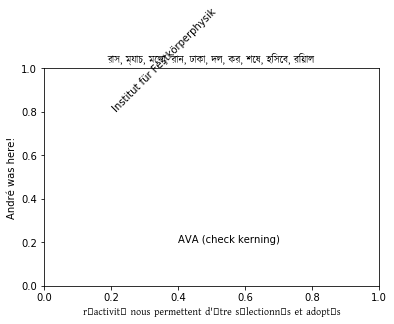

In [24]:
# -*- coding: utf-8 -*-
"""
Demo of unicode support in text and labels.
"""
from __future__ import unicode_literals

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

bangla_font = FontProperties(fname = 'kalpurush.ttf')

words = 'রাস, ম্যাচ, মেলা, রান, ঢাকা, দল, কর, শেষ, হিসেব, রিয়াল'
#plt.yticks(list(range(len(words))), words, color="b", fontproperties=bangla_font)
plt.title('রাস, ম্যাচ, মেলা, রান, ঢাকা, দল, কর, শেষ, হিসেব, রিয়াল', fontproperties=bangla_font)
plt.xlabel("réactivité nous permettent d'être sélectionnés et adoptés", fontproperties=bangla_font)
plt.ylabel('André was here!')
plt.text(0.2, 0.8, 'Institut für Festkörperphysik', rotation=45)
plt.text(0.4, 0.2, 'AVA (check kerning)')

plt.show()

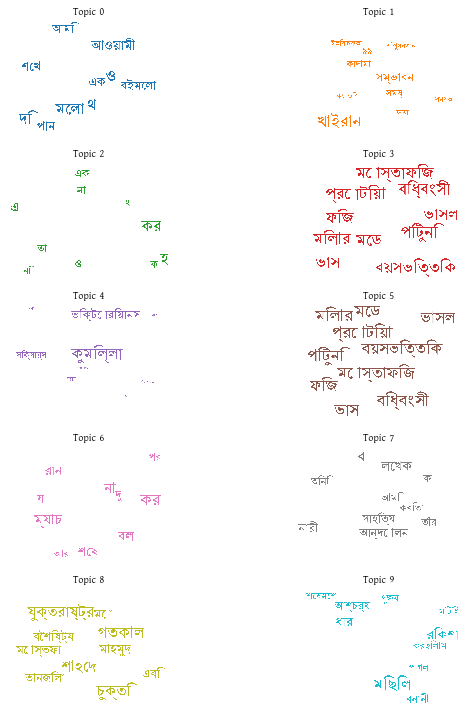

In [25]:
from __future__ import unicode_literals

# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0,
                  font_path='Nikosh.ttf'
                 )

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16), fontproperties=bangla_font)
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

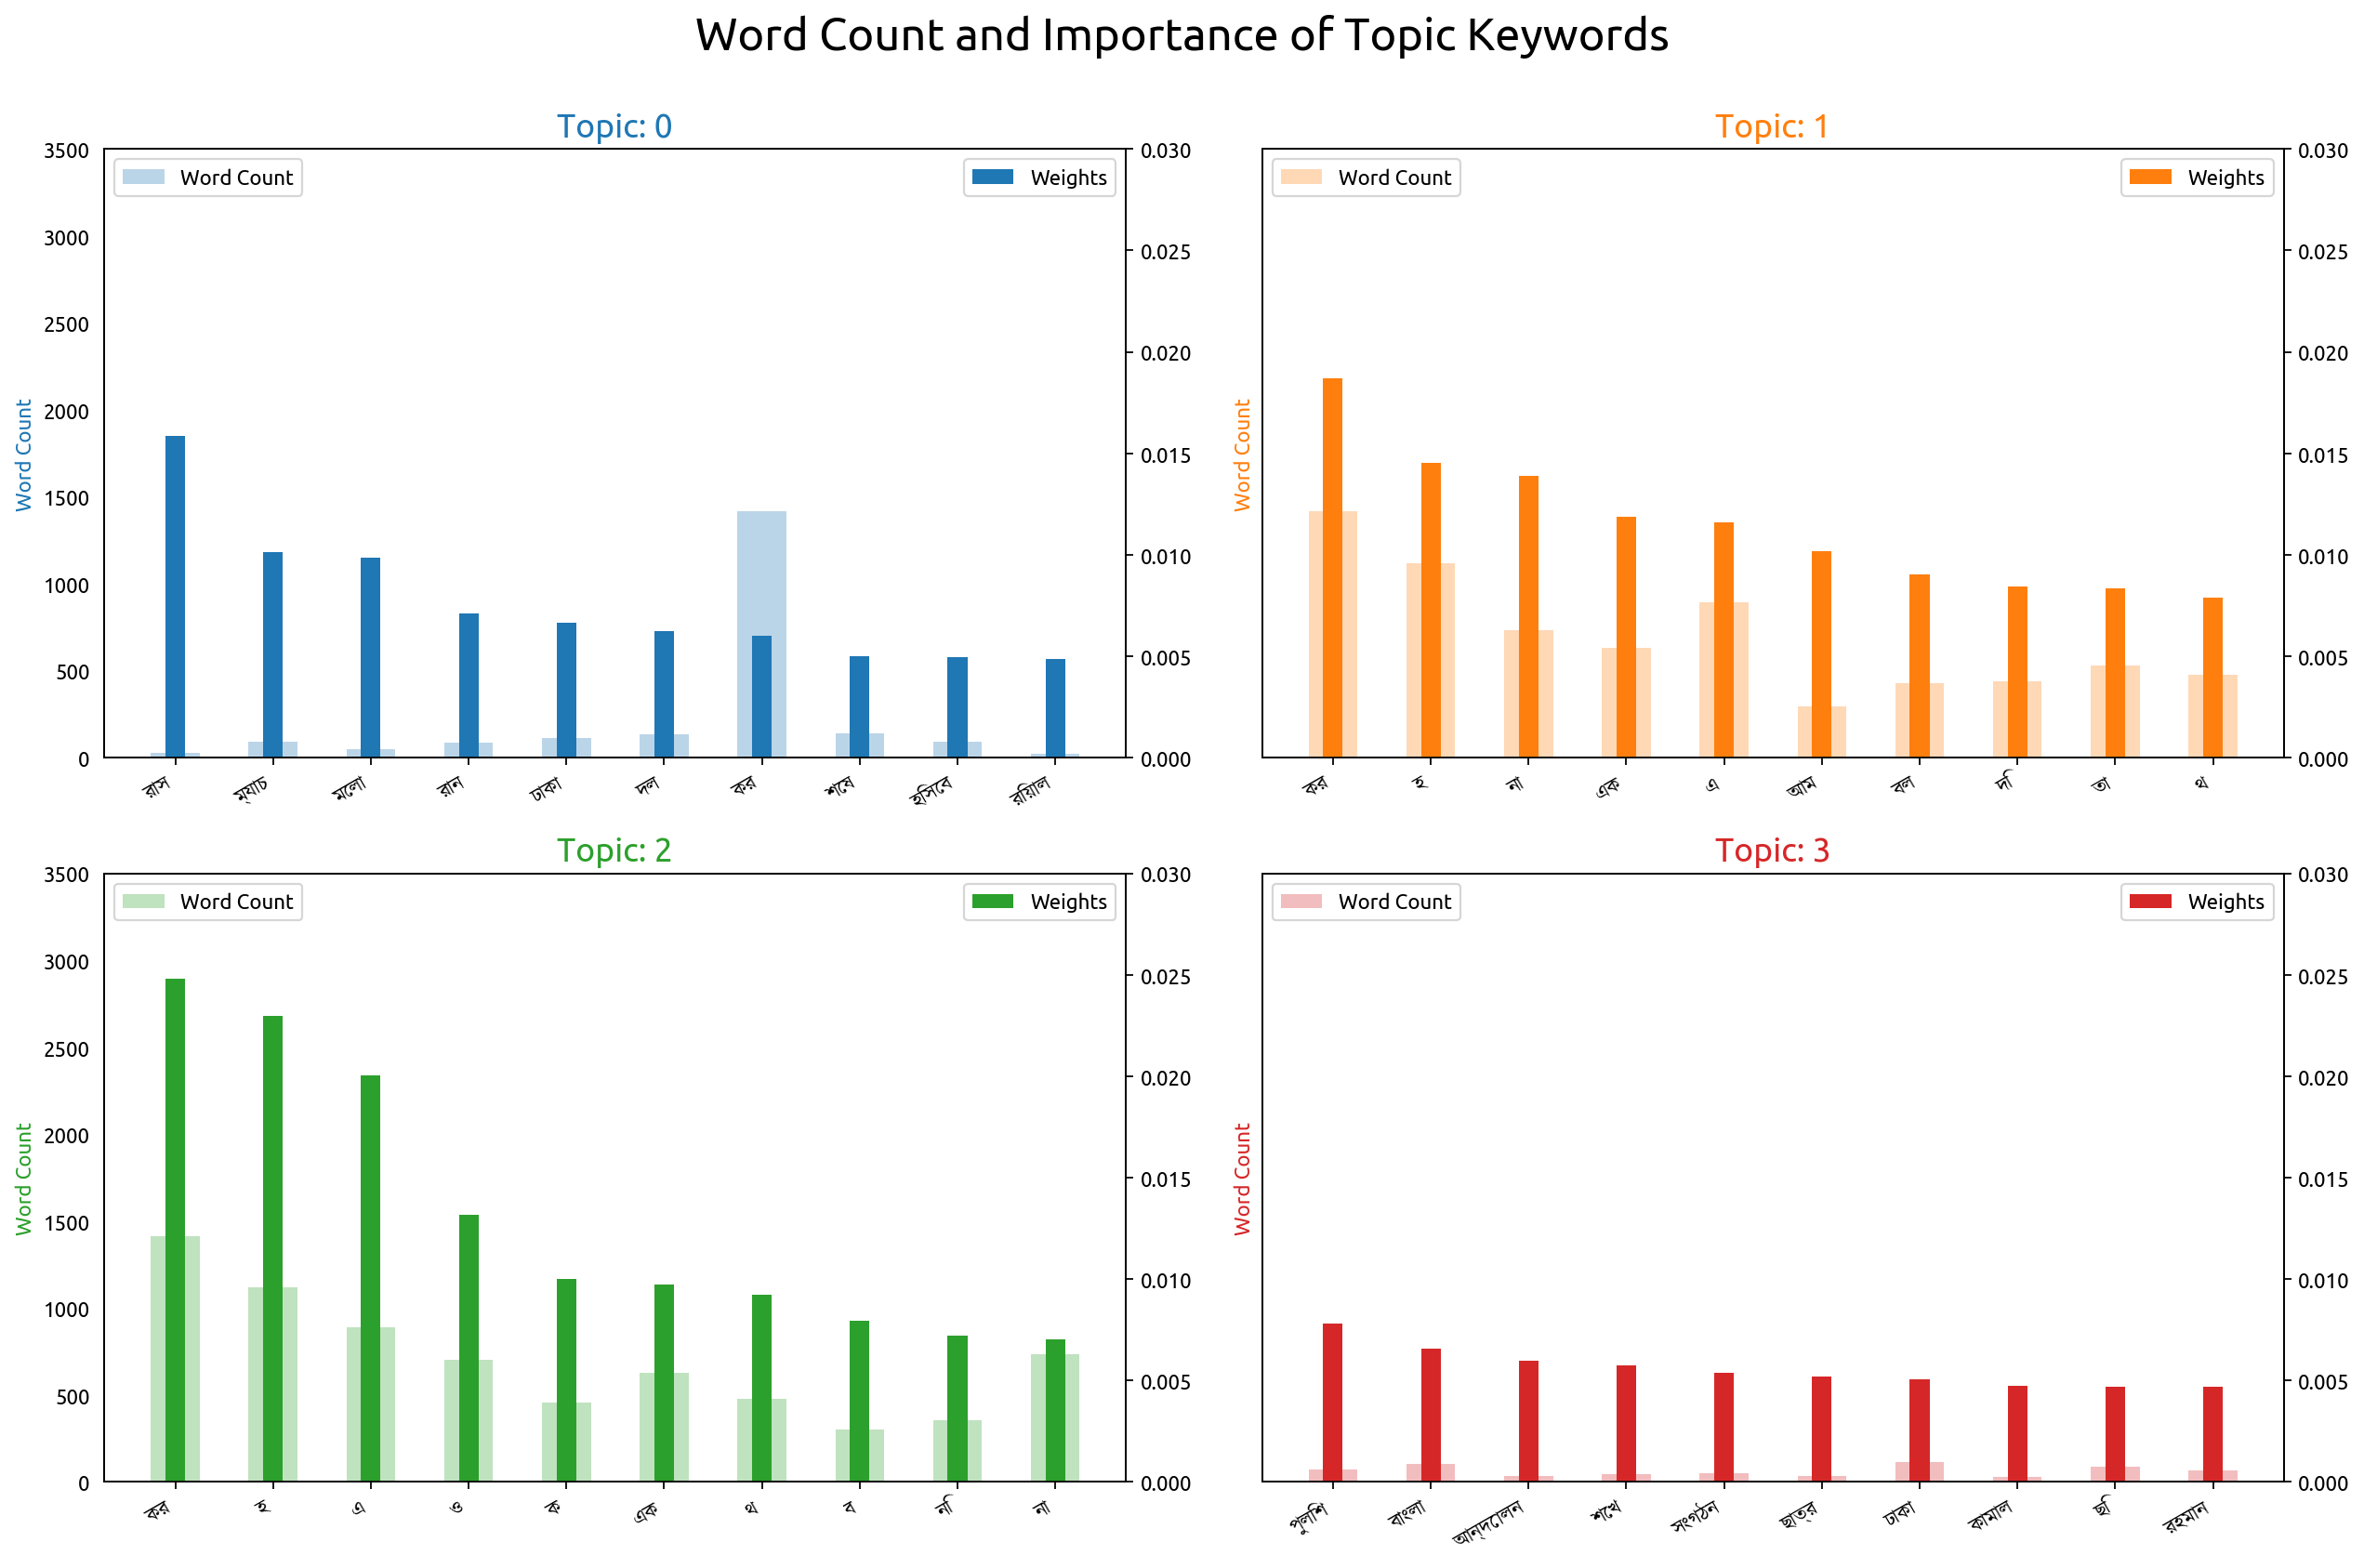

In [54]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontproperties=bangla_font)
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

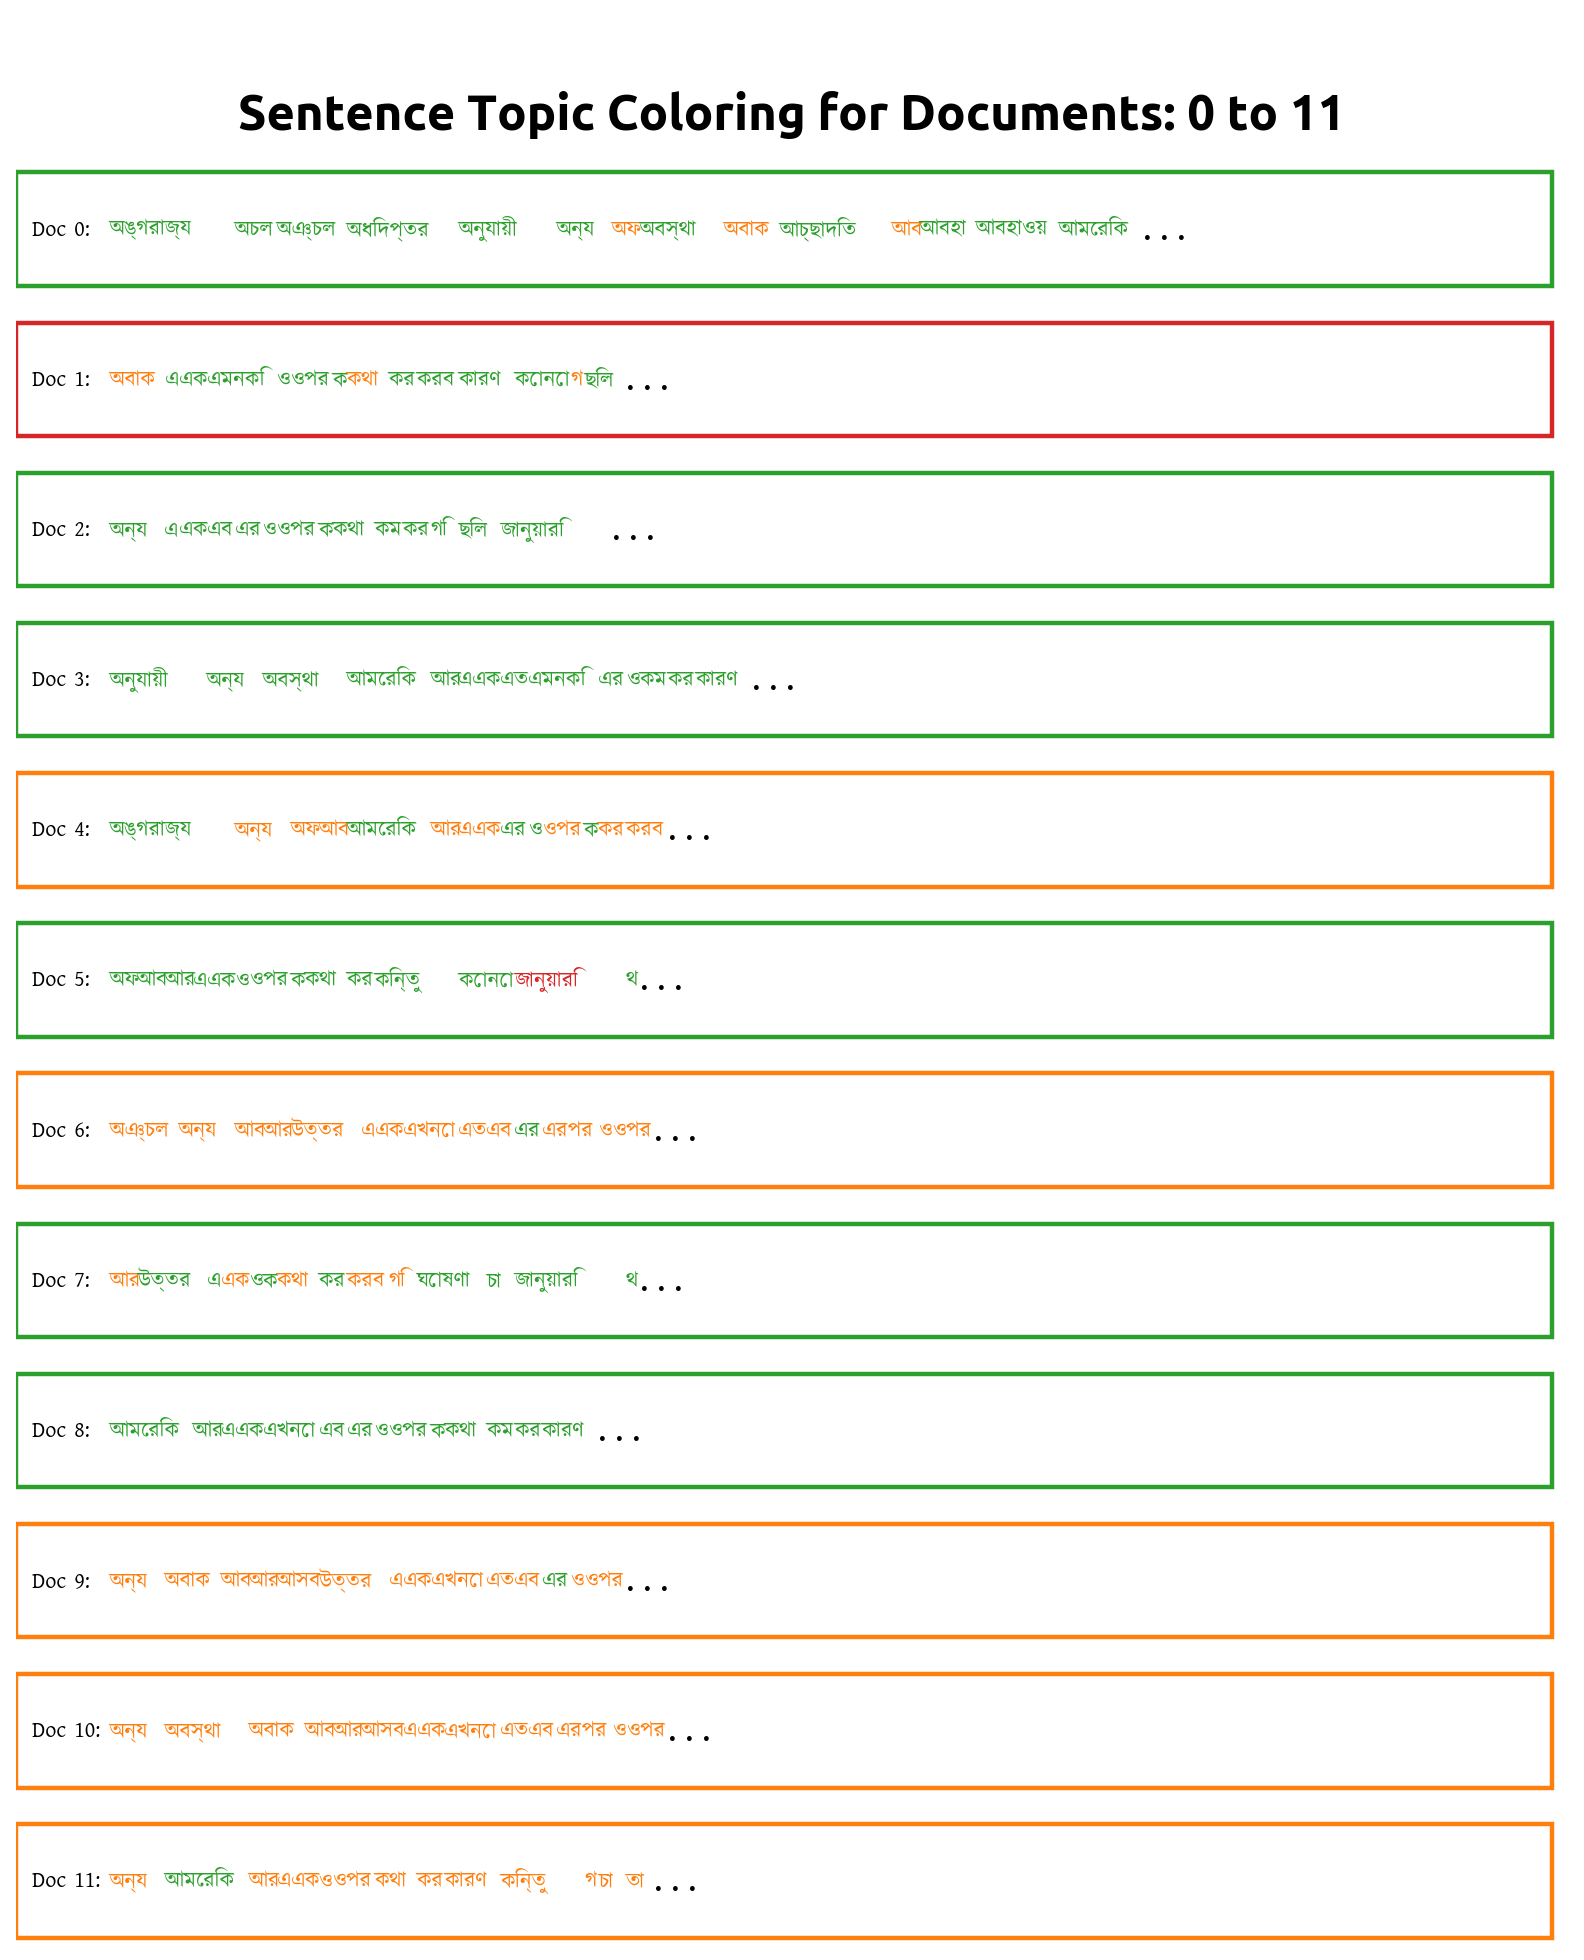

In [62]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(10, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700, fontproperties=bangla_font)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=36, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700, fontproperties=bangla_font)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [63]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

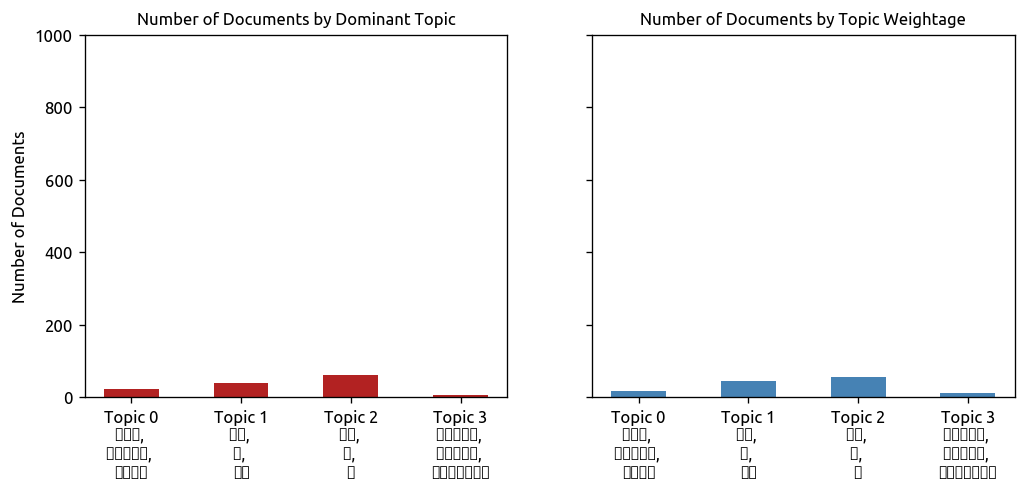

In [66]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [68]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 133 samples in 0.000s...
[t-SNE] Computed neighbors for 133 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 133 / 133
[t-SNE] Mean sigma: 0.187052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.601757
[t-SNE] KL divergence after 850 iterations: 0.133672


Loading BokehJS ...